# Heap Sort

# What Is Heap Sort, and How Does It Work ?

#### Heap sort is a comparison-based sorting technique based on Binary Heap data structure. It is similar to selection sort where we first find the minimum element and place the minimum element at the beginning. We repeat the same process for the remaining elements.[1]

#### In many ways, heapsort is an improved selection sort: like selection sort, it separates its input into sorted and unsorted regions, and it iteratively shrinks the unsorted regions by extracting their largest elements and inserting them into the sorted regions.

## How it Works?
### The Following Shows Heap Sort working using Python

In [29]:
def siftDown(List, parent, end):
    """L[parent:end+1] should almost be a max heap.
       siftDown repairs it so that it is one."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # While parent is actually a parent (has at least a left child).
    while 2*parent + 1 <= end:
        # The indices of the children of parent.
        lchild = 2 * parent + 1
        rchild = 2 * parent + 2
        
        # Assume the parent is larger than the children.
        swap = parent
        
        # Is the parent smaller than the left child?
        if List[swap] < List[lchild]:
            
            # Then swap is set to index of left child.
            swap = lchild
            
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
            
        # Check if right child exists and is smaller than L[swap].
        if rchild <= end and List[swap] < List[rchild]:
            # Then swap is set to index of right child.
            swap = rchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # We have a max heap if the parent is bigger than the children.
        if swap == parent:
            break 
        else:
            # Swap the parent with the bigger child.
            List[parent], List[swap] = List[swap], List[parent]
            # Set parent to bigger child's index.
            parent = swap
    
    # Return the number of comparisons.
    return no_comparisons

In [30]:
def heapsort(List):
    """Sorts the list List in-place using Heap Sort."""
    
    # Keep track of the number of comparisons.
    comparisons = 0
    
    # Turn the list into a max heap.
    # get the position of the last element.
    last_element = len(List) - 1
    
    # Find the last parent.
    last_parent = (last_element - 1) // 2
    
    # Loop backwards through all parents.
    for parent in range(last_parent, -1, -1):
        # Sift down.
        no_comparisons = comparisons + siftDown(List, parent, last_element)

    # Segregate the list L into two parts:
    #   1. L[:end] is a max heap
    #   2. Each element beyond end is greater than everything before it.
    # While there are still elements in the heap.
    
    for end in range(last_element, 0, -1):
        
        # Swap the element at index 0 with the element at index end.
        List[0], List[end] = List[end], List[0]
        
        # Fix the heap - the root is currently out of place.
        comparisons = comparisons + siftDown(List, 0, end - 1)
    
    # Return the number of comparisons.
    return comparisons

## Populate List

In [31]:
List=[1,5,7,8,12,45,78,90,17,86]
List

[1, 5, 7, 8, 12, 45, 78, 90, 17, 86]

## Passing list List into heapsort algrothim 

In [32]:
heapsort(List)
List

[1, 5, 7, 8, 12, 17, 45, 78, 86, 90]

In [33]:
List

[1, 5, 7, 8, 12, 17, 45, 78, 86, 90]

## Visualisation

### imports

In [34]:
# Plotting
import matplotlib.pyplot as plt

# Graphs.
import networkx as nx

# Change default plot size.
plt.rcParams["figure.figsize"] = (20, 8)

# Math functions.
import math

# Numerical functions.
import numpy as np

# Set up the random number generator
rng = np.random.default_rng(seed=0)

#create a random list of ints
List = [1,5,7,8,12,45,78,90,17,86,36,48,28,11,39]
List


[1, 5, 7, 8, 12, 45, 78, 90, 17, 86, 36, 48, 28, 11, 39]

In [35]:
def drawtree(List, highlight=None):
    
  # Create a fully balanced binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(List), 2)))
    
  # Remove nodes beyond the length of List.
  T.remove_nodes_from(list(T.nodes)[len(List):])
    
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, List)), copy=True)
    
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
    
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='red', node_size=1600, font_size=32)
    
  # Highlight nodes if needed.
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=2600, font_size=32)

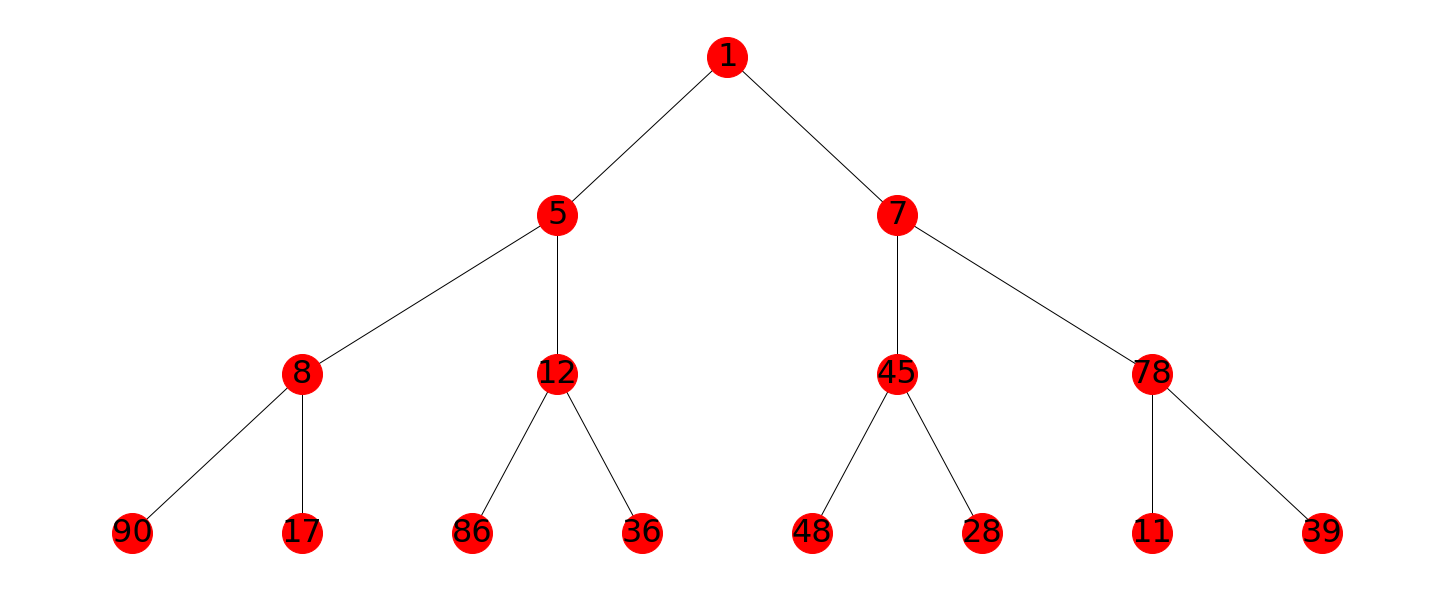

In [36]:
drawtree(List)

In [37]:
newList= list(rng.permutation(20))
newList

[4, 19, 6, 2, 13, 16, 3, 11, 10, 8, 0, 12, 7, 5, 18, 17, 14, 9, 1, 15]

## Before Heap Sort

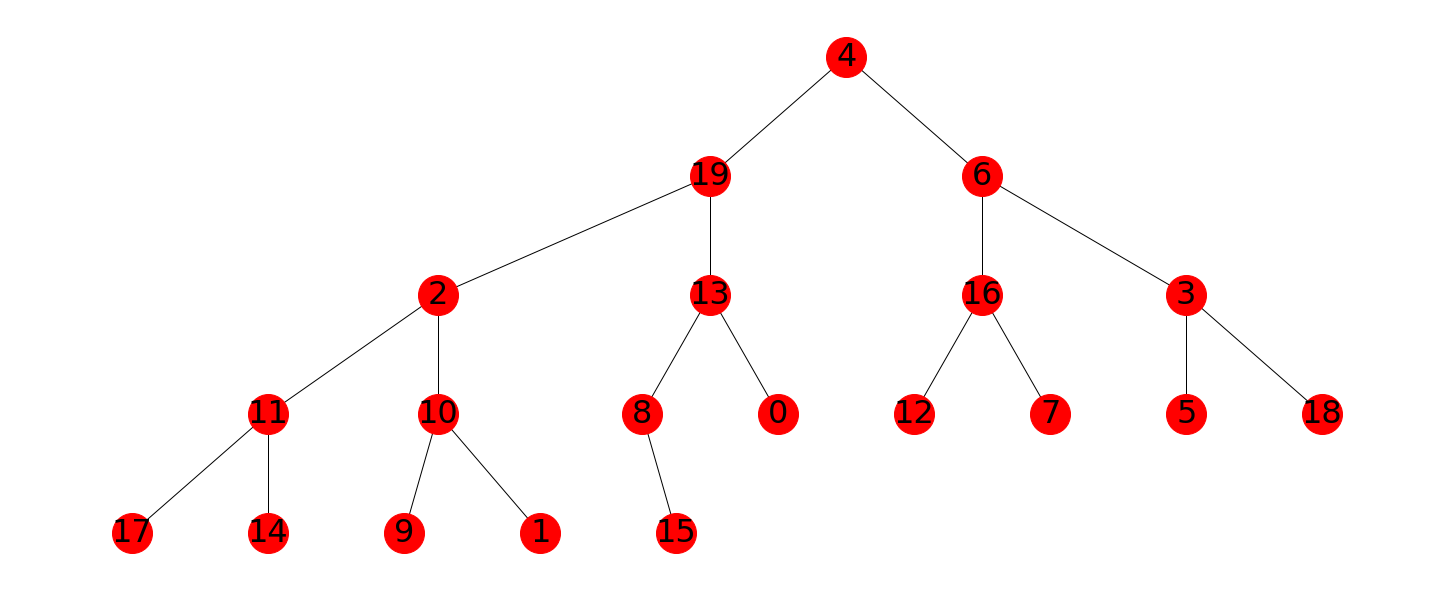

In [38]:
drawtree(newList)

In [39]:
heapsort(newList)
newList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# After Heap Sort

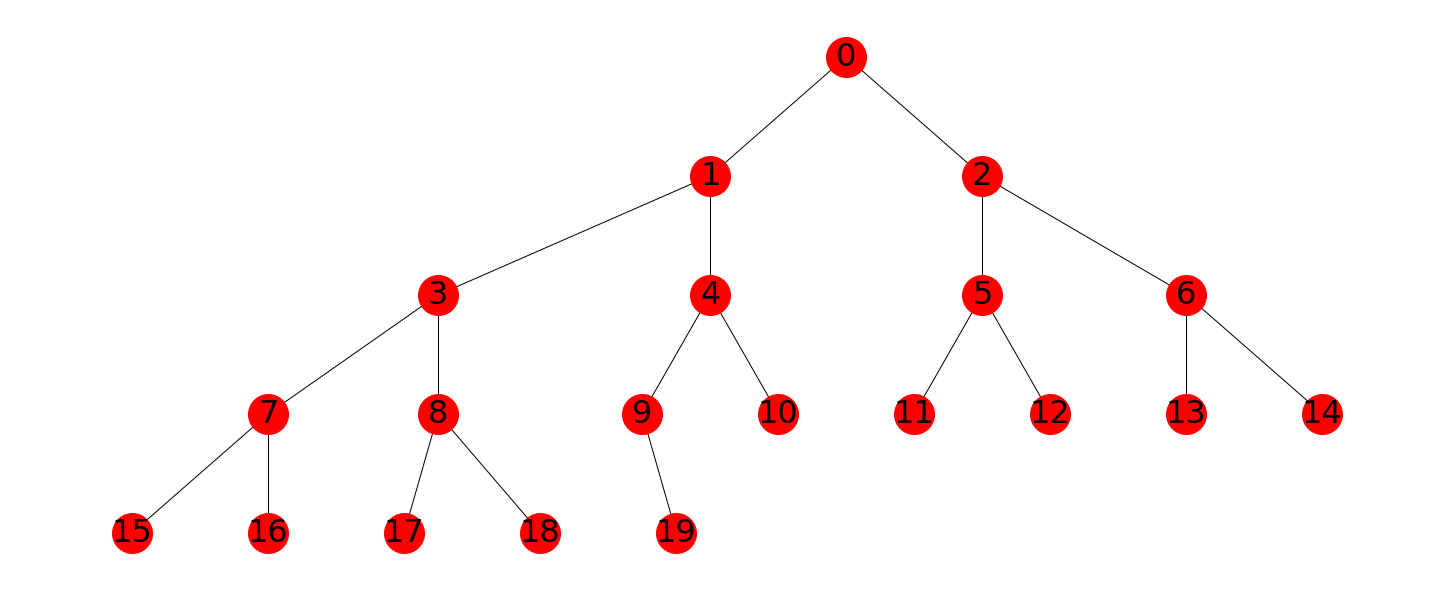

In [40]:
drawtree(newList)

In [41]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Numerical functions.
import numpy as np

# Set up the random number generator
rng = np.random.default_rng(seed=0)

recList=newList= list(rng.permutation(100))

def drawBars(List):
    #define Matplotlib figure and axis
    fig, ax = plt.subplots()

    #create simple line plot
    ax.plot([0, 100],[0, 100])

    count = 0
    countx = 0 
    while (count < len(recList)):   
        #add rectangle to plot
        ax.add_patch(Rectangle((countx, 0), 1, recList[count]))
        count = count + 1
        countx = countx + 1
    
    #display plot
    plt.show()

In [42]:
def siftDown(List, parent, end):
    """L[parent:end+1] should almost be a max heap.
       siftDown repairs it so that it is one."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # While parent is actually a parent (has at least a left child).
    while 2*parent + 1 <= end:
        # The indices of the children of parent.
        lchild = 2 * parent + 1
        rchild = 2 * parent + 2
        
        # Assume the parent is larger than the children.
        swap = parent
        
        # Is the parent smaller than the left child?
        if List[swap] < List[lchild]:
            
            # Then swap is set to index of left child.
            swap = lchild
            
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
            
        # Check if right child exists and is smaller than L[swap].
        if rchild <= end and List[swap] < List[rchild]:
            # Then swap is set to index of right child.
            swap = rchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # We have a max heap if the parent is bigger than the children.
        if swap == parent:
            break 
        else:
            # Swap the parent with the bigger child.
            List[parent], List[swap] = List[swap], List[parent]
            # Set parent to bigger child's index.
            parent = swap
    
    # Return the number of comparisons.
    return no_comparisons

In [43]:
def heapsort(List):
    """Sorts the list List in-place using Heap Sort."""
    
    # Keep track of the number of comparisons.
    comparisons = 0
    
    # Turn the list into a max heap.
    # get the position of the last element.
    last_element = len(List) - 1
    
    # Find the last parent.
    last_parent = (last_element - 1) // 2
    
    # Loop backwards through all parents.
    for parent in range(last_parent, -1, -1):
        # Sift down.
        no_comparisons = comparisons + siftDown(List, parent, last_element)

    # Segregate the list L into two parts:
    #   1. L[:end] is a max heap
    #   2. Each element beyond end is greater than everything before it.
    # While there are still elements in the heap.
    
    for end in range(last_element, 0, -1):
        
        # Swap the element at index 0 with the element at index end.
        List[0], List[end] = List[end], List[0]
        
        # Fix the heap - the root is currently out of place.
        comparisons = comparisons + siftDown(List, 0, end - 1)
    
    # Return the number of comparisons.
    return comparisons

# Before Heap Sort

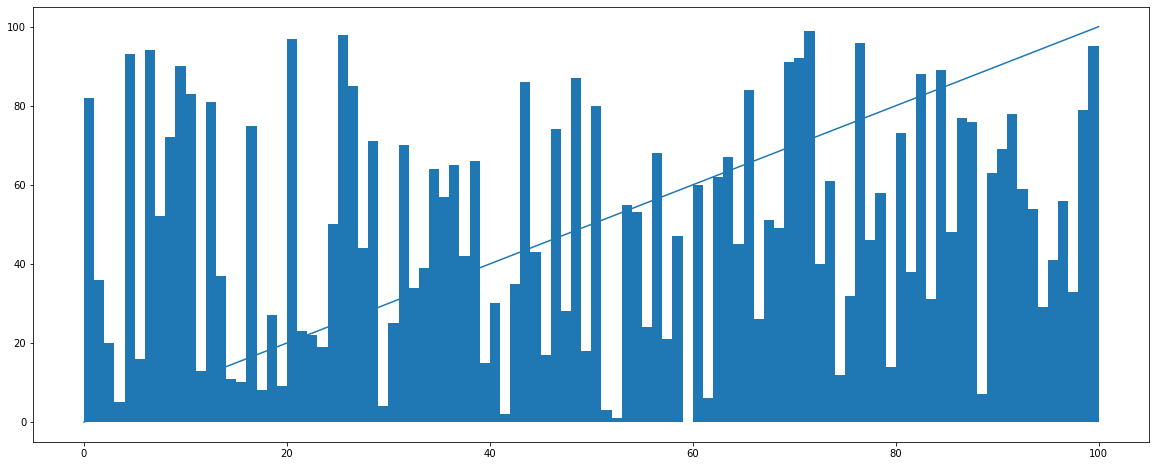

In [44]:
drawBars(recList)

# After Heap Sort

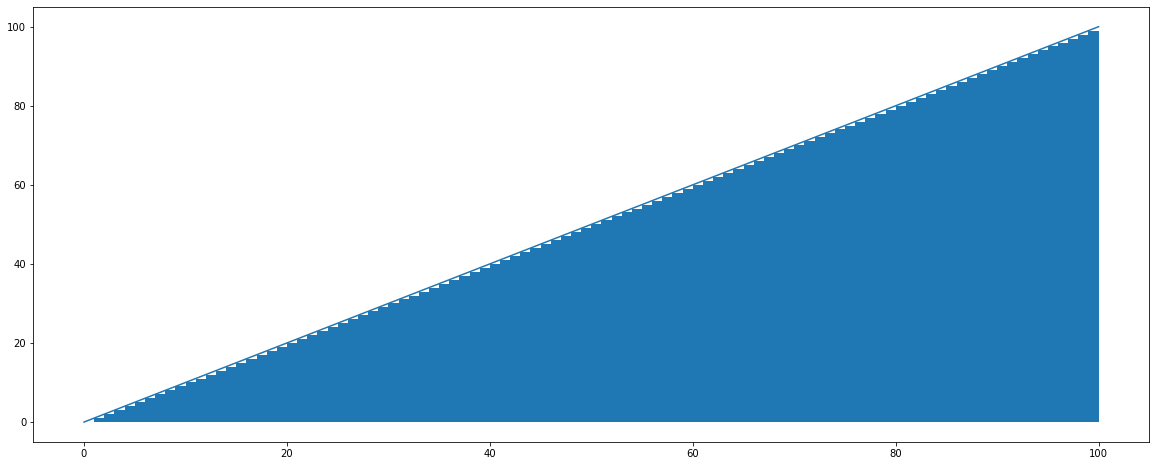

In [45]:
heapsort(recList)
drawBars(recList)

# Time Complexity

#### The heapsort algorithm is a comparison-based sorting algorithm used in computer science. It can be thought of as an improved selection sort.  Instead of wasting time scanning an unsorted region linearly, heapsort maintains the unsorted region in a heap data structure to find the largest element in each step more quickly. Though slightly slower in practice on most machines than a well-implemented quicksort, it has the advantage of a more favorable worst-case O(n log n) runtime. Heapsort is an in-place algorithm, but it is not a stable sort.[2]

## O(n log n)

#### In O(n log n), n is the input size (or number of elements). Log n is actually a logarithm to the base 2. In the divide and conquer approach, we divide the problem into sub problems(divide) and solve them separately and then combine the solutions. When the list of input size n is divided into two halves, we get the log n time complexity. That’s why Heap sort’s time complexity is O(n log n).

# Comparing Heap Sort

In [46]:
# Plotting
import matplotlib.pyplot as plt

# Graphs.
import networkx as nx

# Change default plot size.
plt.rcParams["figure.figsize"] = (20, 8)

# Math functions.
import math

# Numerical functions.
import numpy as np

# Set up the random number generator
rng = np.random.default_rng(seed=0)

In [68]:
# This list will be used to demo the difference in sorts
# we will be comparing heap sort and Bubble sort
# demoList= list(rng.permutation(20))

In [69]:
def siftDown(List, parent, end):
    """L[parent:end+1] should almost be a max heap.
       siftDown repairs it so that it is one."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # While parent is actually a parent (has at least a left child).
    while 2*parent + 1 <= end:
        # The indices of the children of parent.
        lchild = 2 * parent + 1
        rchild = 2 * parent + 2
        
        # Assume the parent is larger than the children.
        swap = parent
        
        # Is the parent smaller than the left child?
        if List[swap] < List[lchild]:
            
            # Then swap is set to index of left child.
            swap = lchild
            
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
            
        # Check if right child exists and is smaller than L[swap].
        if rchild <= end and List[swap] < List[rchild]:
            # Then swap is set to index of right child.
            swap = rchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # We have a max heap if the parent is bigger than the children.
        if swap == parent:
            break 
        else:
            # Swap the parent with the bigger child.
            List[parent], List[swap] = List[swap], List[parent]
            # Set parent to bigger child's index.
            parent = swap
    
    # Return the number of comparisons.
    return no_comparisons

# Bubble Sort

In [70]:
# Bubble sort as a function.
def bubblesort(L):
    # Keep track of number of comparisons.
    no_comparisons = 0

    # Bubble every (biggest) element up.
    for j in range(len(L) - 1):
        # Keep track of any swaps.
        swapped = False
        # Compare all elements that are side by side.
        for i in range(len(L) - 1 - j):
            # Compare the ith element with the (i+1)th.
            if L[i] > L[i+1]:
                # Swap the elements.
                L[i], L[i+1] = L[i+1], L[i]
                # Keep track of the swap.
                swapped = True
            # Add a comparison.
            no_comparisons = no_comparisons + 1
        # Quit if we didn't make any swaps.
        if not swapped:
            break
    # Return the number of comparisons made.
    return no_comparisons

# Heap Sort 

In [71]:
def heapsort(List):
    """Sorts the list List in-place using Heap Sort."""
    
    # Keep track of the number of comparisons.
    comparisons = 0
    
    # Turn the list into a max heap.
    # get the position of the last element.
    last_element = len(List) - 1
    
    # Find the last parent.
    last_parent = (last_element - 1) // 2
    
    # Loop backwards through all parents.
    for parent in range(last_parent, -1, -1):
        # Sift down.
        no_comparisons = comparisons + siftDown(List, parent, last_element)

    # Segregate the list L into two parts:
    #   1. L[:end] is a max heap
    #   2. Each element beyond end is greater than everything before it.
    # While there are still elements in the heap.
    
    for end in range(last_element, 0, -1):
        
        # Swap the element at index 0 with the element at index end.
        List[0], List[end] = List[end], List[0]
        
        # Fix the heap - the root is currently out of place.
        comparisons = comparisons + siftDown(List, 0, end - 1)
    
    # Return the number of comparisons.
    return comparisons

In [72]:
bubblesortList = [9, 16, 14, 6, 4, 19, 10, 13, 2, 8, 1, 17, 11, 3, 18, 0, 5, 15, 7, 12]
heapsortList = [9, 16, 14, 6, 4, 19, 10, 13, 2, 8, 1, 17, 11, 3, 18, 0, 5, 15, 7, 12]

In [73]:
bubblesortList

[9, 16, 14, 6, 4, 19, 10, 13, 2, 8, 1, 17, 11, 3, 18, 0, 5, 15, 7, 12]

In [74]:
bubblesort(bubblesortList)

184

In [75]:
heapsortList

[9, 16, 14, 6, 4, 19, 10, 13, 2, 8, 1, 17, 11, 3, 18, 0, 5, 15, 7, 12]

In [76]:
heapsort(heapsortList)

54

#### Using two lists with the same list of values we compared the speed of two sorting algorithms , I used a simple list of 20 values to check this. We campared the bubble sort algorithm to the Heapsort algorithm. As you can see above the list of comparisons will show the speen of the algorithm, with bubble sort it took 184 comparisons to fully sort the list, this this alot slower then the heapsort witch did it in 54 comparisons.

#### This will also be able to be seen using longer Lists
#### We will now do a list of 30

In [79]:
heapsortList = [15,
 17,
 2,
 24,
 20,
 21,
 6,
 26,
 1,
 5,
 8,
 7,
 13,
 22,
 19,
 12,
 25,
 10,
 14,
 28,
 11,
 4,
 18,
 27,
 29,
 16,
 3,
 0,
 9,
 23]

In [80]:
bubblesortList = [15,
 17,
 2,
 24,
 20,
 21,
 6,
 26,
 1,
 5,
 8,
 7,
 13,
 22,
 19,
 12,
 25,
 10,
 14,
 28,
 11,
 4,
 18,
 27,
 29,
 16,
 3,
 0,
 9,
 23]

In [81]:
heapsort(heapsortList)

106

In [82]:
bubblesort(bubblesortList)

434

#### As you can see adding just 10 extra numbers has caused bubblesort jump from 184 to 434 while heapsort has a smaller jump 54 to 106. This show that Heapsort has a faster runtime and is the better algorithm.

# References